In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing,cross_validation,svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
suez_cement=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/T M G Holding.csv",index_col=1)

In [3]:
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS691S1C011,4819957,22287042.43,927,4.48,4.72,4.46,4.62
1/3/2013 0:00,EGS691S1C011,3627545,17134786.61,945,4.65,4.76,4.63,4.72
1/6/2013 0:00,EGS691S1C011,2607806,12245969.99,607,4.73,4.76,4.64,4.70
1/8/2013 0:00,EGS691S1C011,5684753,26984291.44,866,4.69,4.84,4.60,4.75
1/9/2013 0:00,EGS691S1C011,2980833,14233038.27,648,4.81,4.85,4.73,4.77


In [4]:
suez_cement=suez_cement[-500:]
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/16/2015 0:00,EGS691S1C011,4702924,29110717.23,909,6.10,6.25,6.10,6.19
12/17/2015 0:00,EGS691S1C011,4914247,31506053.32,923,6.31,6.52,6.30,6.41
12/20/2015 0:00,EGS691S1C011,2735600,17372872.43,776,6.31,6.47,6.24,6.35
12/21/2015 0:00,EGS691S1C011,3114447,19892475.45,634,6.31,6.43,6.28,6.39
12/22/2015 0:00,EGS691S1C011,3886471,24924460.82,921,6.40,6.55,6.34,6.41


In [5]:
suez_cement['EWMA_12']=suez_cement['CLOSE_PRICE'].ewm(span=12).mean()
suez_cement['HL_PCT']=(suez_cement['HIGH_PRICE']-suez_cement['LOW_PRICE'])/suez_cement['LOW_PRICE']*100.0
suez_cement['PCT_change']=(suez_cement['CLOSE_PRICE']-suez_cement['OPEN_PRICE'])/suez_cement['OPEN_PRICE']*100.0
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,EWMA_12,HL_PCT,PCT_change
TRADE_DATE,,,,,,,,,,,
12/16/2015 0:00,EGS691S1C011,4702924,29110717.23,909,6.10,6.25,6.10,6.19,6.190000,2.459016,1.475410
12/17/2015 0:00,EGS691S1C011,4914247,31506053.32,923,6.31,6.52,6.30,6.41,6.309167,3.492063,1.584786
12/20/2015 0:00,EGS691S1C011,2735600,17372872.43,776,6.31,6.47,6.24,6.35,6.325104,3.685897,0.633914
12/21/2015 0:00,EGS691S1C011,3114447,19892475.45,634,6.31,6.43,6.28,6.39,6.345589,2.388535,1.267829
12/22/2015 0:00,EGS691S1C011,3886471,24924460.82,921,6.40,6.55,6.34,6.41,6.363089,3.312303,0.156250


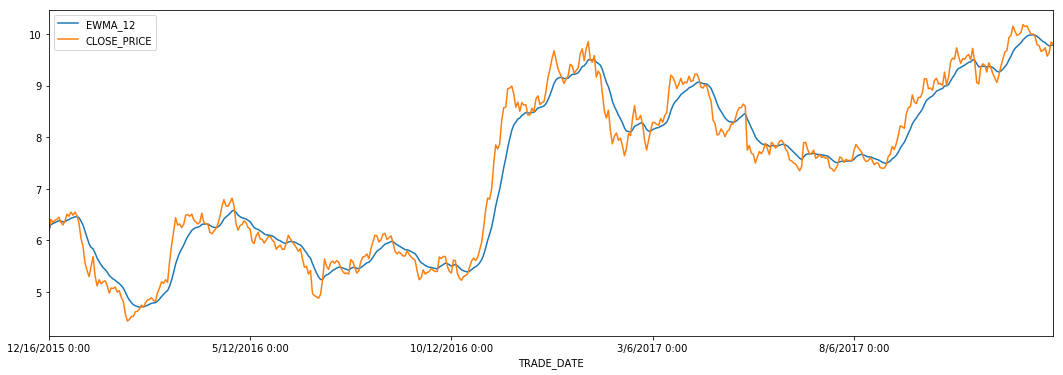

In [6]:
tmp=suez_cement[['EWMA_12','CLOSE_PRICE']].plot(figsize=(18,6))
plt.show()

In [7]:
suez_cement.dropna(inplace=True)
len(suez_cement)

500

In [8]:
suez_cement['CLOSE_PRICE'].shift(-5).tail()

TRADE_DATE
12/25/2017 0:00   NaN
12/26/2017 0:00   NaN
12/27/2017 0:00   NaN
12/28/2017 0:00   NaN
12/31/2017 0:00   NaN
Name: CLOSE_PRICE, dtype: float64

In [9]:
X=suez_cement[['EWMA_12','HL_PCT','PCT_change']].values
X

array([[ 6.19      ,  2.45901639,  1.47540984],
       [ 6.30916667,  3.49206349,  1.58478605],
       [ 6.32510393,  3.68589744,  0.63391442],
       ..., 
       [ 9.76757127,  2.30607966,  0.        ],
       [ 9.77871415,  3.33333333,  2.5       ],
       [ 9.7819889 ,  2.16494845,  0.51282051]])

In [10]:
y=suez_cement['CLOSE_PRICE'].values
y

array([  6.19,   6.41,   6.35,   6.39,   6.41,   6.45,   6.35,   6.3 ,
         6.37,   6.51,   6.47,   6.55,   6.49,   6.55,   6.48,   6.33,
         6.04,   5.88,   5.56,   5.42,   5.3 ,   5.49,   5.69,   5.31,
         5.12,   5.24,   5.16,   5.2 ,   5.22,   5.13,   4.98,   5.08,
         5.07,   5.1 ,   5.  ,   5.03,   4.9 ,   4.82,   4.58,   4.44,
         4.47,   4.53,   4.53,   4.62,   4.63,   4.67,   4.75,   4.71,
         4.79,   4.85,   4.86,   4.89,   4.84,   4.82,   4.99,   5.08,
         5.2 ,   5.17,   5.24,   5.19,   5.59,   5.91,   6.18,   6.44,
         6.3 ,   6.32,   6.25,   6.31,   6.49,   6.5 ,   6.47,   6.51,
         6.4 ,   6.36,   6.32,   6.35,   6.53,   6.35,   6.32,   6.32,
         6.16,   6.13,   6.18,   6.23,   6.32,   6.46,   6.66,   6.79,
         6.67,   6.66,   6.73,   6.82,   6.67,   6.33,   6.2 ,   6.29,
         6.31,   6.38,   6.34,   6.25,   6.22,   5.98,   5.94,   6.09,
         6.16,   6.03,   6.02,   5.95,   6.01,   6.07,   6.08,   6.01,
      

In [11]:
len(X),len(y)

(500, 500)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=1)

In [13]:
len(X),len(X_train),len(X_test)

(500, 350, 150)

In [14]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [15]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=3)
SVR=svm.SVR(kernel='rbf')

In [16]:
LR.fit(X_train,y_train)
KNN.fit(X_train,y_train)
SVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred_LR=LR.predict(X_test)
y_pred_KNN=KNN.predict(X_test)
y_pred_SVR=SVR.predict(X_test)
len(y_pred_LR)

150

In [18]:
suez_cement['LR_pred']=np.nan
suez_cement['KNN_pred']=np.nan
suez_cement['SVR_pred']=np.nan
suez_cement['LR_pred'].iloc[350:]=y_pred_LR
suez_cement['KNN_pred'].iloc[350:]=y_pred_KNN
suez_cement['SVR_pred'].iloc[350:]=y_pred_SVR

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
suez_cement.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,EWMA_12,HL_PCT,PCT_change,LR_pred,KNN_pred,SVR_pred
TRADE_DATE,,,,,,,,,,,,,,
12/25/2017 0:00,EGS691S1C011,2550914,24808931.74,332,9.70,9.83,9.55,9.73,9.830905,2.931937,0.309278,9.911019,9.456667,9.708873
12/26/2017 0:00,EGS691S1C011,952893,9123532.62,271,9.70,9.70,9.51,9.57,9.790766,1.997897,-1.340206,9.728832,9.283333,9.230674
12/27/2017 0:00,EGS691S1C011,2670503,25737256.31,425,9.64,9.76,9.54,9.64,9.767571,2.306080,0.000000,9.809607,9.313333,9.631217
12/28/2017 0:00,EGS691S1C011,4395442,43235515.01,521,9.60,9.92,9.60,9.84,9.778714,3.333333,2.500000,10.026156,9.666667,9.191927
12/31/2017 0:00,EGS691S1C011,876400,8591940.29,202,9.75,9.91,9.70,9.80,9.781989,2.164948,0.512821,9.857997,9.243333,9.623455


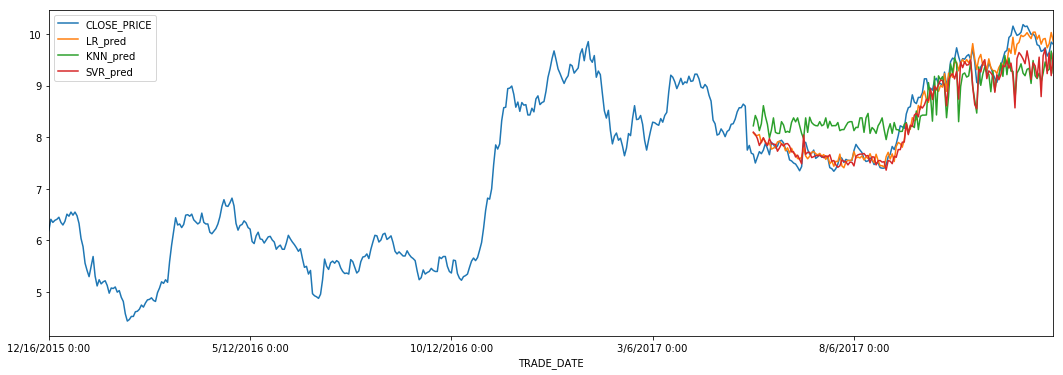

In [20]:
suez_cement[['CLOSE_PRICE','LR_pred','KNN_pred','SVR_pred']].plot(figsize=(18,6))
plt.show()

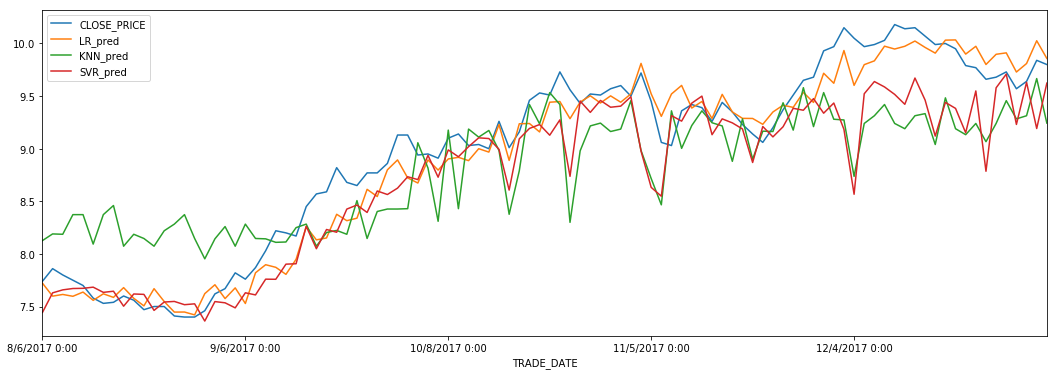

In [21]:
suez_cement[['CLOSE_PRICE','LR_pred','KNN_pred','SVR_pred']][400:].plot(figsize=(18,6))
plt.show()

In [22]:
LR_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_LR))
KNN_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_KNN))
SVR_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_SVR))

In [23]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('SVR :',SVR_RMSE)

Linear Regression : 0.186465320226
KNN : 0.570066143011
SVR : 0.333321727536


In [25]:
LR_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_LR)
KNN_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_KNN)
SVR_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_SVR)

In [26]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('SVR :',SVR_RMSE)

Linear Regression : 0.0347693156471
KNN : 0.324975407407
SVR : 0.111103374047
